In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import beta
import pandas as pd

from pyplr.calibrate import CalibrationContext

In [11]:
# load the sample spectra and convert to melanopic irradiance
cc = CalibrationContext(data='../data/S2_corrected_oo_spectra.csv', binwidth=1)
cc.

In [12]:
cc.

In [8]:
# load the sample spectra and convert to melanopic irradiance
spectra = pd.read_csv("../data/S2_corrected_oo_spectra.csv")
spectra = spectra.loc[spectra.intensity!=0]
spectra['input'] = spectra['intensity'] / 4095

#mi = stlab.spectra_to_melanopic_irradiance(spectra, grouper=['led','input'])
vl = stlab.spectra_to_luminance(spectra, grouper=['led','input'])

colors = stlab.get_led_colors()

fig, axs = plt.subplots(2,5, figsize=(16,5))
axs = [item for sublist in axs for item in sublist]

for idx, df in vl.groupby(level=0):
    xdata = df.index.get_level_values(1)
    ydata = df.values
    ydata = ydata / np.max(ydata)
    
    # Defines function we want to fit
    def func(x, a, b):
        return beta.cdf(x, a, b)

    axs[idx].scatter(xdata, ydata, color=colors[idx], s=2)
    
    # Fit
    popt, pcov = curve_fit(beta.cdf, xdata, ydata, [2.0, 1.0])
    ypred = func(xdata, *popt)
    axs[idx].plot(xdata, ypred, color=colors[idx], label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
    axs[idx].set_title('Channel {}'.format(idx))
    axs[idx].legend()
plt.tight_layout()

ModuleNotFoundError: No module named 'CIE'

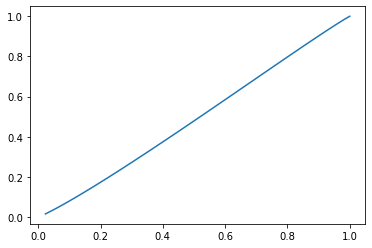

In [11]:
plt.plot(ypred, xdata)

In [17]:
ypred * 4095

array([  94.3181451 ,  174.98897136,  251.24482328,  324.79121948,
        396.40344935,  466.52478678,  535.44160252,  603.35379898,
        670.40865131,  736.71907979,  802.37437496,  867.44690207,
        931.99650428,  996.07351232, 1059.72087023, 1122.97567914,
       1185.87034515, 1248.43345052, 1310.69042692, 1372.66408409,
       1434.3750309 , 1495.84201526, 1557.08220173, 1618.11140087,
       1678.94426081, 1739.59442885, 1800.07468922, 1860.39708175,
       1920.57300514, 1980.61330785, 2040.52836898, 2100.32817124,
       2160.02236758, 2219.62034304, 2279.13127294, 2338.5641788 ,
       2397.92798285, 2457.23156234, 2516.48380473, 2575.69366491,
       2634.87022575, 2694.02276339, 2753.16081925, 2812.29428057,
       2871.43347247, 2930.58926468, 2989.77319753, 3048.99763297,
       3108.27593847, 3167.62271476, 3227.05408245, 3286.58804942,
       3346.24499089, 3406.04829032, 3466.02521619, 3526.20815546,
       3586.63640719, 3647.35889622, 3708.4384852 , 3769.95926